In [76]:
import pandas as pd
import geopandas as gpd

crash_data = pd.read_csv("crash_data.csv", low_memory = False)

# filter data to only include Pittsburgh
filtered_data = crash_data[crash_data['MUNICIPALITY'].astype(str) == '2301']

filtered_data = crash_data[ (crash_data['MUNICIPALITY'].astype(str) == '2301') & 
                            (crash_data['DEC_LAT'].notna()) & 
                            (crash_data['DEC_LONG'].notna())
]

# "SPEEDING: driver was speeding , SPEEDING_RELATED: speeding has to do with crash 
# selected_columns = filtered_data[['MUNICIPALITY', '_id','CRASH_YEAR', 
#                                  'CRASH_MONTH', 'DAY_OF_WEEK', 'SPEED_LIMIT', 
#                                  'SPEEDING', 'SPEEDING_RELATED', 'DEC_LAT','DEC_LONG']]


selected_columns = filtered_data[['SPEEDING', 'SPEEDING_RELATED','DEC_LAT','DEC_LONG']]


# only include those who were SPEEDING or SPEEDING_RELATED and crashed
speed_filtered_data = selected_columns[(selected_columns['SPEEDING'] != 0) & (selected_columns['SPEEDING_RELATED'] != 0)]

lat_lon_data = speed_filtered_data[['DEC_LAT', 'DEC_LONG']]

lat_lon_data.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'text-align': 'center'
}) 

,DEC_LAT,DEC_LONG
1075,40.389200,-79.985400
1343,40.449500,-80.089000
1373,40.448400,-80.007600
1536,40.456300,-79.956500
1555,40.426300,-80.030900
1701,40.439500,-80.009800
2149,40.431500,-79.958900
2454,40.382300,-79.982300
2950,40.389700,-79.933900
2964,40.430100,-79.998900


In [3]:
import os
print(os.getcwd())


/Users/nehakotha/Downloads/CMPINF0010


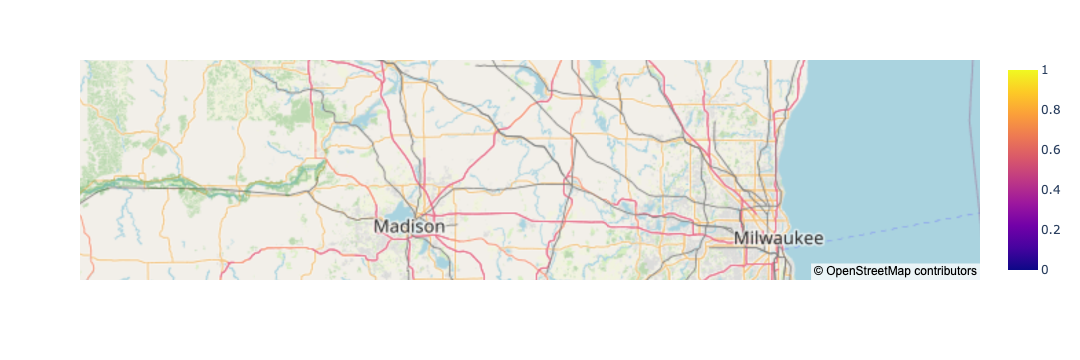

In [90]:
import plotly
import plotly_express as px
import folium
from folium.plugins import HeatMap

fig = px.density_mapbox(lat_lon_data, lat='DEC_LAT', lon= 'DEC_LONG', radius = 15, 
                        center=dict(lat=lat_lon_data.DEC_LAT.mean(), lon=lat_lon_data.DEC_LONG.mean()), 
                        zoom=4, mapbox_style='open-street-map', height=800)
fig

In [94]:
HeatMap(data, 
        min_opacity=0.05, 
        max_opacity=0.9, 
        radius=25,
        gradient={ 0.0: 'blue', 0.25: 'cyan', 0.5: 'yellow', 0.75: 'orange', 1.0: 'red' }  # Rainbow gradient
       ).add_to(m)

# Show the map
m

In [96]:
m = folium.Map(location=[lat_lon_data.DEC_LAT.mean(),lat_lon_data.DEC_LONG.mean()], zoom_start=6, control_scale=True)
m
map_values = lat_lon_data[['DEC_LAT', 'DEC_LONG']]
data = map_values.values.tolist()

Hm = HeatMap(data, min_opacity = 0.05, max_opacity = 0.9, radius = 25).add_to(m)
m